In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1

# Step 3: Add the 'overweight' column

In [6]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df.drop(columns=['BMI'], inplace=True)  # Drop the BMI column after using it

In [7]:
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1

# Step 3: Normalize the data

In [9]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)


In [10]:
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

# Step 4: Draw the categorical plot

In [23]:
def draw_cat_plot():
    #Create a DataFrame for the cat plot using pd.melt
    df_cat = pd.melt(df, id_vars=['cardio'], 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by cardio
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Draw the catplot with 'sns.catplot'
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')
    
    return fig


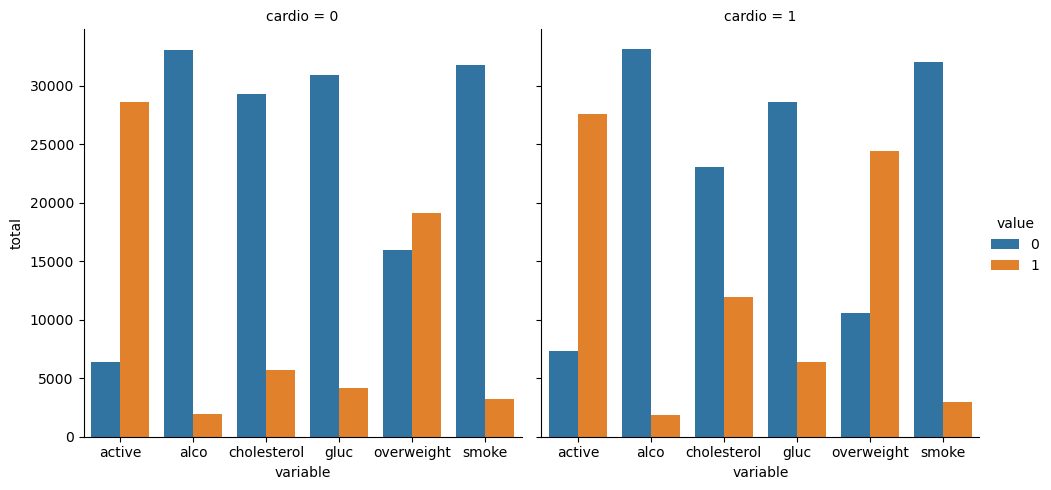

In [46]:
catplot_figure = draw_cat_plot()

# Step 5: Clean the data

In [44]:
def clean_data(df):
    return df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]



In [54]:
df_clean = clean_data(df)

# Step 6: Draw the heatmap 

In [29]:
def draw_heat_map(df_clean):
    # Step 6a: Calculate the correlation matrix
    corr = df_clean.corr()

    # Step 6b: Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Step 6c: Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Step 6d: Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, cmap='coolwarm', ax=ax)
    
    return fig


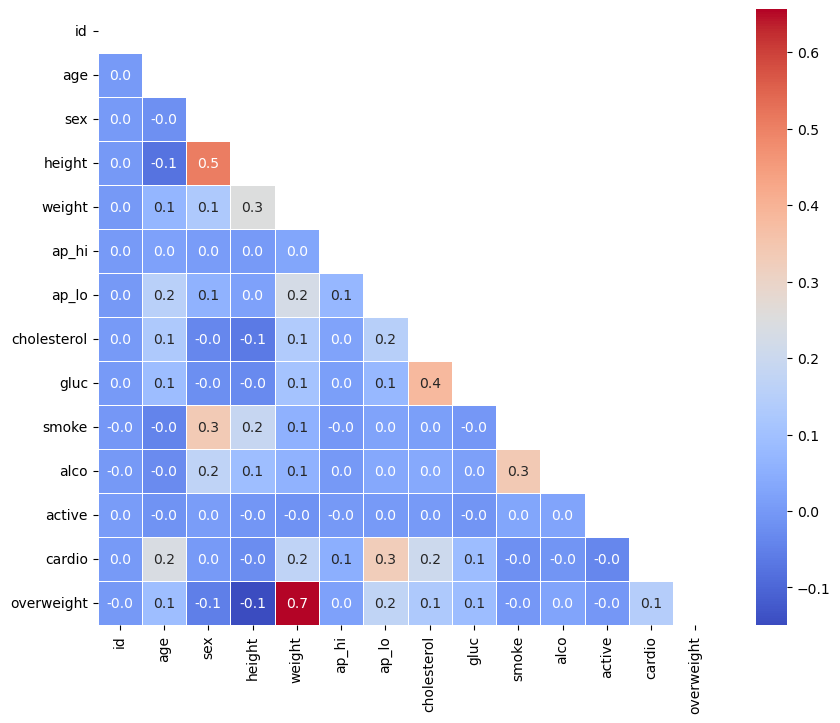

In [56]:
heatmap_figure = draw_heat_map(df_clean)